# Breast Cancer Winscoin - EDA & Modelling
- Using PCA, t-SNE techniques for Dimensionality reduction
- Using Feature Engg. , Feature scaling & Mean Normalization techniques to set-up features for efficient modelling.
- Used Tree based algorithms to get the best output, in order to predict the "Breast Cancer"

<center>
<img align="center" src="http://www.jcytol.org/articles/2016/33/4/images/JCytol_2016_33_4_182_190449_f1.jpg">
<br>
</center>
    

The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available data set from the UCI machine learning repository. The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei present in the image. The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.

The area on the aspirate slides to be analyzed was visually selected for minimal nuclear overlap. The image for digital analysis was generated by a JVC TK-1070U color video camera mounted above an Olympus microscope and the image was projected into the camera with a 63 x objective and a 2.5 x ocular. The image was captured as a 512 x 480 resolution, 8 bit/pixel (Black and White) file. The aspirated material was expressed onto a silane-coated glass slide, which was placed under a similar slide. A typical image contains approximately from 10 to 40 nuclei. After computing 10 features for each nucleus, the mean, standart error and extreme value was computed, as it mentioned above. These features are modeled such that higher values are typically associated with malignancy. 

In [1]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
from sklearn import decomposition
import warnings
from sklearn.preprocessing import StandardScaler
#Ignore filter warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#By default, Pandas displays 20 columns and 60 rows, I will increase it to 150 and 100
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv("../input/data.csv", index_col = 'id')

In [3]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
842302                0.14710         0.2419                 0.07871   
842517                0.07017         0.1812                 0.05667   
84300903              0.12790         0.2069                 0.05999   
84348301              0.10520         0.2597                 0.09744   
84358402              0.10430         0.1809                 0.05883   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
id                                                                      
842302       1.0950      0.9053         8.589   153.40       0.006399   
842517       0.5435      0.7339         3.398    74.08       0.005225   
84300903     0.7456      0.7869         4.585    94.03       0.006150   
84348301     0.4956      1.1560         3.445    27.23       0.009110   
84358402     0.7572      0.7813         5.438    94.44       0.011490   

          compactness_se  concavity_se  concave points_se  symmetry_se  \
id                                                                       
842302           0.04904       0.05373            0.01587      0.03003   
842517           0.01308       0.01860            0.01340      0.01389   
84300903         0.04006       0.03832            0.02058      0.02250   
84348301         0.07458       0.05661            0.01867      0.05963   
84358402         0.02461       0.05688            0.01885      0.01756   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
id                                                                             
842302                0.006193         25.38          17.33           184.60   
842517                0.003532         24.99          23.41           158.80   
84300903              0.004571         23.57          25.53           152.50   
84348301              0.009208         14.91          26.50            98.87   
84358402              0.005115         22.54          16.67           152.20   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
id                                                                           
842302        2019.0            0.1622             0.6656           0.7119   
842517        1956.0            0.1238             0.1866           0.2416   
84300903      1709.0            0.1444             0.4245           0.4504   
84348301       567.7            0.2098             0.8663           0.6869   
84358402      1575.0            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                        
842302                  0.2654          0.4601                  0.11890   
842517                  0.1860          0.2750                  0.08902   
84300903                0.2430          0.3613                  0.08758   
84348301       

### Feature Explanation

From the database description, features like radius, perimeter, area are perfect comprehensible to me. But what do texture, smoothness, compactness, concavity, symmetry and fractal dimensions mean exactly?

Texture is a standard deviation of gray-scale values. Each pixel of an image is represented by the 8-bit integer, or *a byte*, from 0 to 255 providing the *amount* of light, where 0 is clear black and 255 is clear white. The darker the image is the lower is the mean of intensity level of a pixel, i.e. byte. 
So, the SD of gray-scale values means how intense levels are spread for particular individual cells. The higher SD the more contrasting the image is.

Next, smoothness is quantified by measuring the difference between length of radial line and the mean length of two radial lines surrounding it
    
<center>
<img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig3/AS:648234070442001@1531562454255/Line-segments-used-to-compute-smoothness-The-diierence-in-length-of-the-radial.png">
<br> 
</center>
    
If the number is small, then the contour is smooth in that region:

$$ smoothness = \frac{\sum\limits_{i}\left|r_i - \frac{r_{i-1}+r_{i+1}}{2}\right|}{perimeter}$$ 

The concavity is captured by drawing chords between two boundary points, which lie outside the nuclear. For the concavity_mean the mean value of these lengths is calculated.

# <center>
<img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig4/AS:648234070466567@1531562454273/Line-segments-used-to-compute-concavity-and-concave-points-The-bold-line-segment.png">
<br> 
In order to measure symmetry, the major axis, or longest chord through the center, is found. We then measure the length difference between lines perpendicular to the major axis and the nuclear boundary in both directions.
    
   # <center>
<img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig5/AS:648234070458368@1531562454289/Line-segments-used-to-compute-symmetry-The-lengths-of-perpendicular-segments-on-the.png">
<br> 
    
Fractal dimensions is approximated using the coastline approximation: the perimeter of the nucleaus is measured by a using increasingly larger rulers, and as the ruler size increases, the perimeter decreases. Plotting log transformation of the perimeter against log of the ruler size and measuring the downward slope gives us the fractal dimension. As with all the shape features, a higher value corresponds to a less regular contour and thus to a higher probability of malignancy.

****

### EDA

Let's look at the general statistics. including mean, std, median, percentiles, and range.

In [4]:
df.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   
Unnamed: 32                0.0         NaN         NaN         NaN   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.40000

![](http://)Let's have a look how the target class is distributed:

In [5]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

![](http://)As it can be seen, there is no missing values, except for the last column. All independent features are numerical and the target feature is converted to categorical.

In [6]:
#And convert it to categorical feature:
df['diagnosis'] = df['diagnosis'].astype('category')

#Remove the last empty column
df.drop('Unnamed: 32',axis = 1 ,inplace = True)

It might be usiful to convert the target class denoting malignant as 0 and benign as 1, and examine correlation among variables:

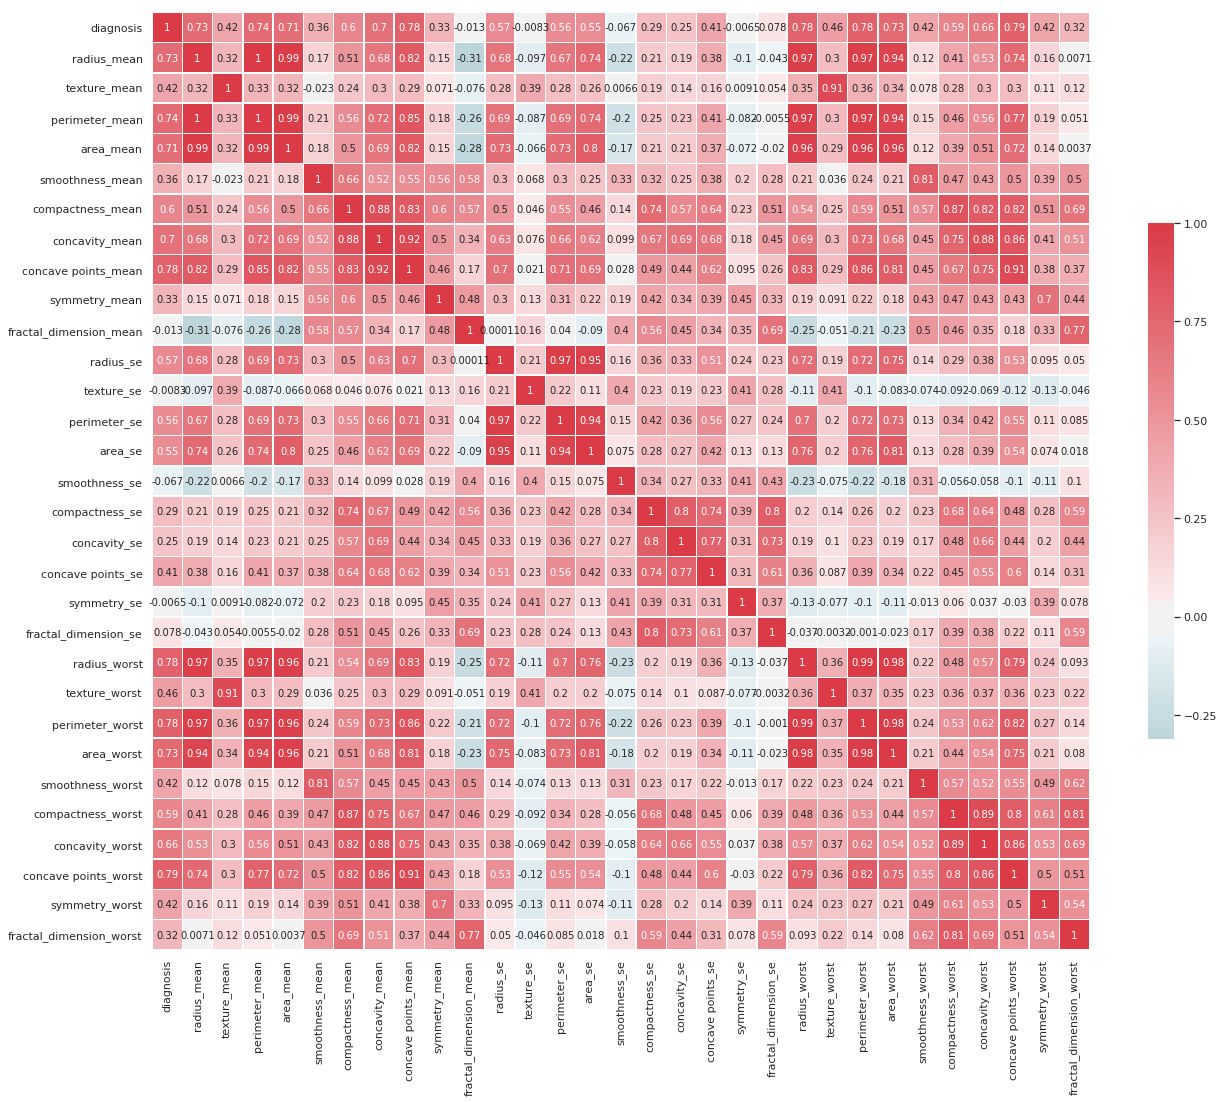

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

There are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. That is not surprising, as these features were modeled in such way that higher values are typically associated with malignancy. To examine *multicollinearity* I will look at pairwise scatter plots of pairs of first 10 and last 10 variables (in the sake of simplicity and visualization), looking for near perfect relationships. 

In [8]:
means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

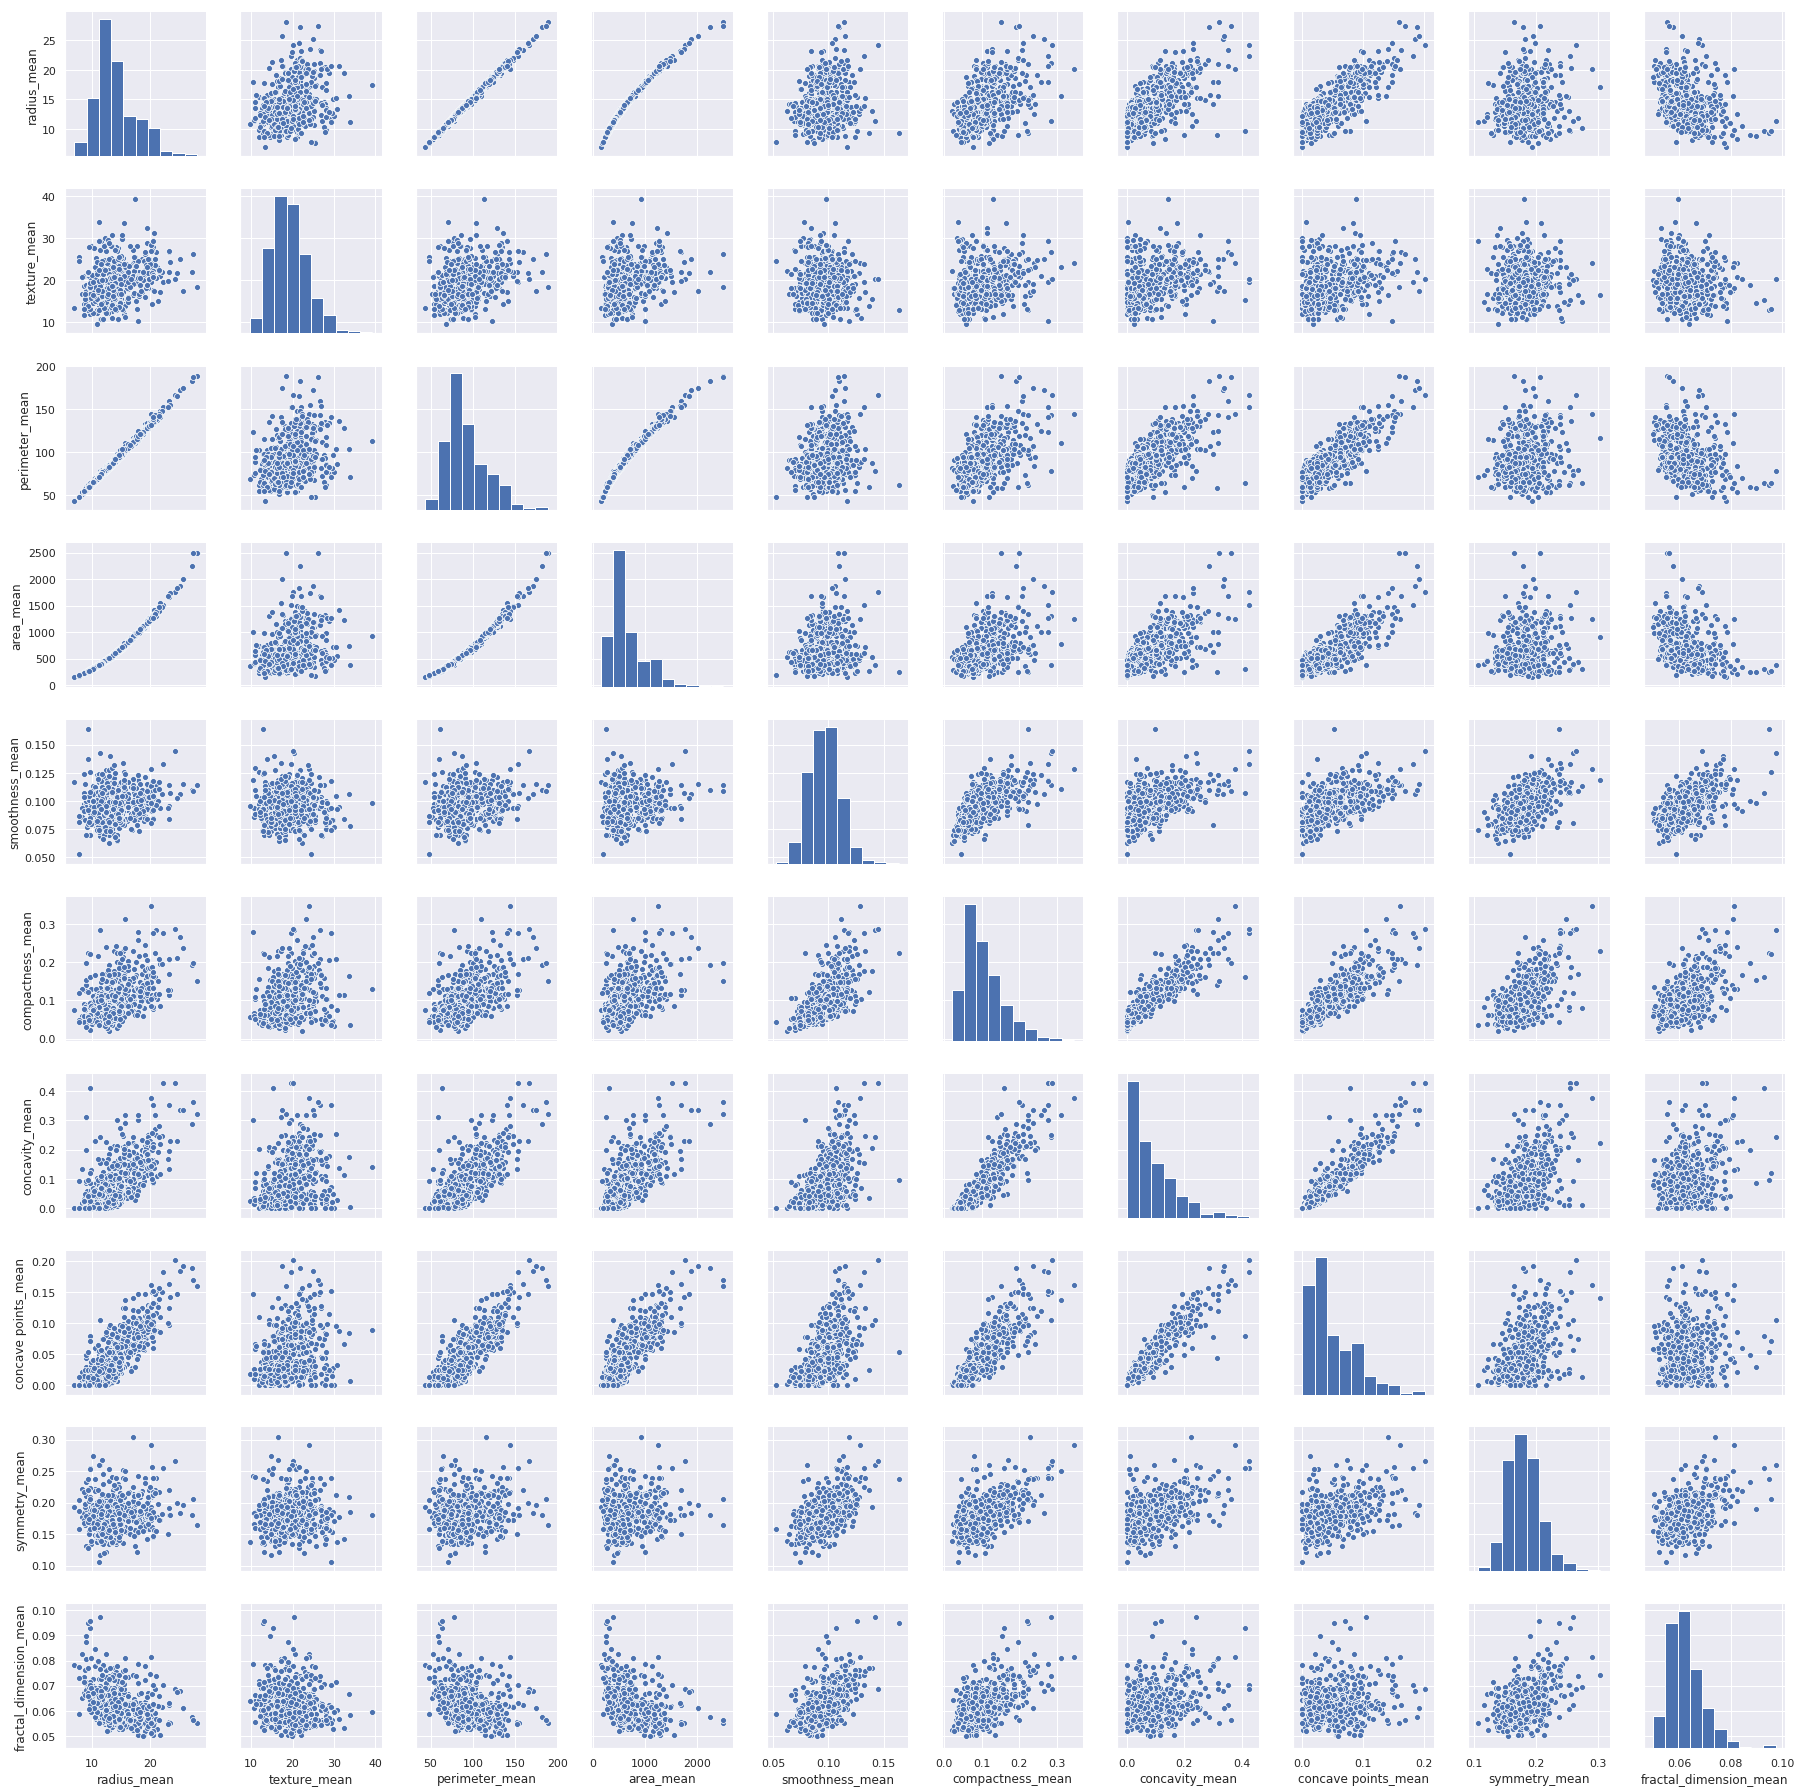

In [9]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[means]);


Next, let's see how means are distributed among target class:

In [10]:
means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

I standartized variables, as their ranges are quite different and not representable on a small graph. Every `violinplot` includes markers indicating the median and the interquartile (middle 50%) range. In first nine features the median of malignant tumor is easily contrasted with the benign. Generally speaking, for the benign mass the median is lower for all features, which makes sense, because features were modeled such that higher values are typically associated with malignancy. 

For example,`area_mean` is higher for cancerous mass on average.

Let's look at the standart deviation of features:

In [11]:
df.groupby(['diagnosis'])['area_mean'].mean()

diagnosis
0    462.790196
1    978.376415
Name: area_mean, dtype: float64

In [12]:
def plot_violinplot(feat_list):
    scaler = StandardScaler()
    feat_scaled = pd.DataFrame(scaler.fit_transform(df[feat_list]),columns=feat_list, index = df.index)
    data = pd.concat([df['diagnosis'],feat_scaled],axis=1)
    df_melt = pd.melt(frame=data, value_vars=feat_list, id_vars=['diagnosis'])
    fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=300)
    sns.violinplot(x="variable",y="value",hue = "diagnosis",data=df_melt,split = True, inner="quart",palette='Set2').set_title('Distribution of features among malignant and benign tumours'.format(feat_list))
    plt.xticks(rotation=45)
    L=plt.legend()
    L.get_texts()[0].set_text('Benign')
    L.get_texts()[1].set_text('Malignant')

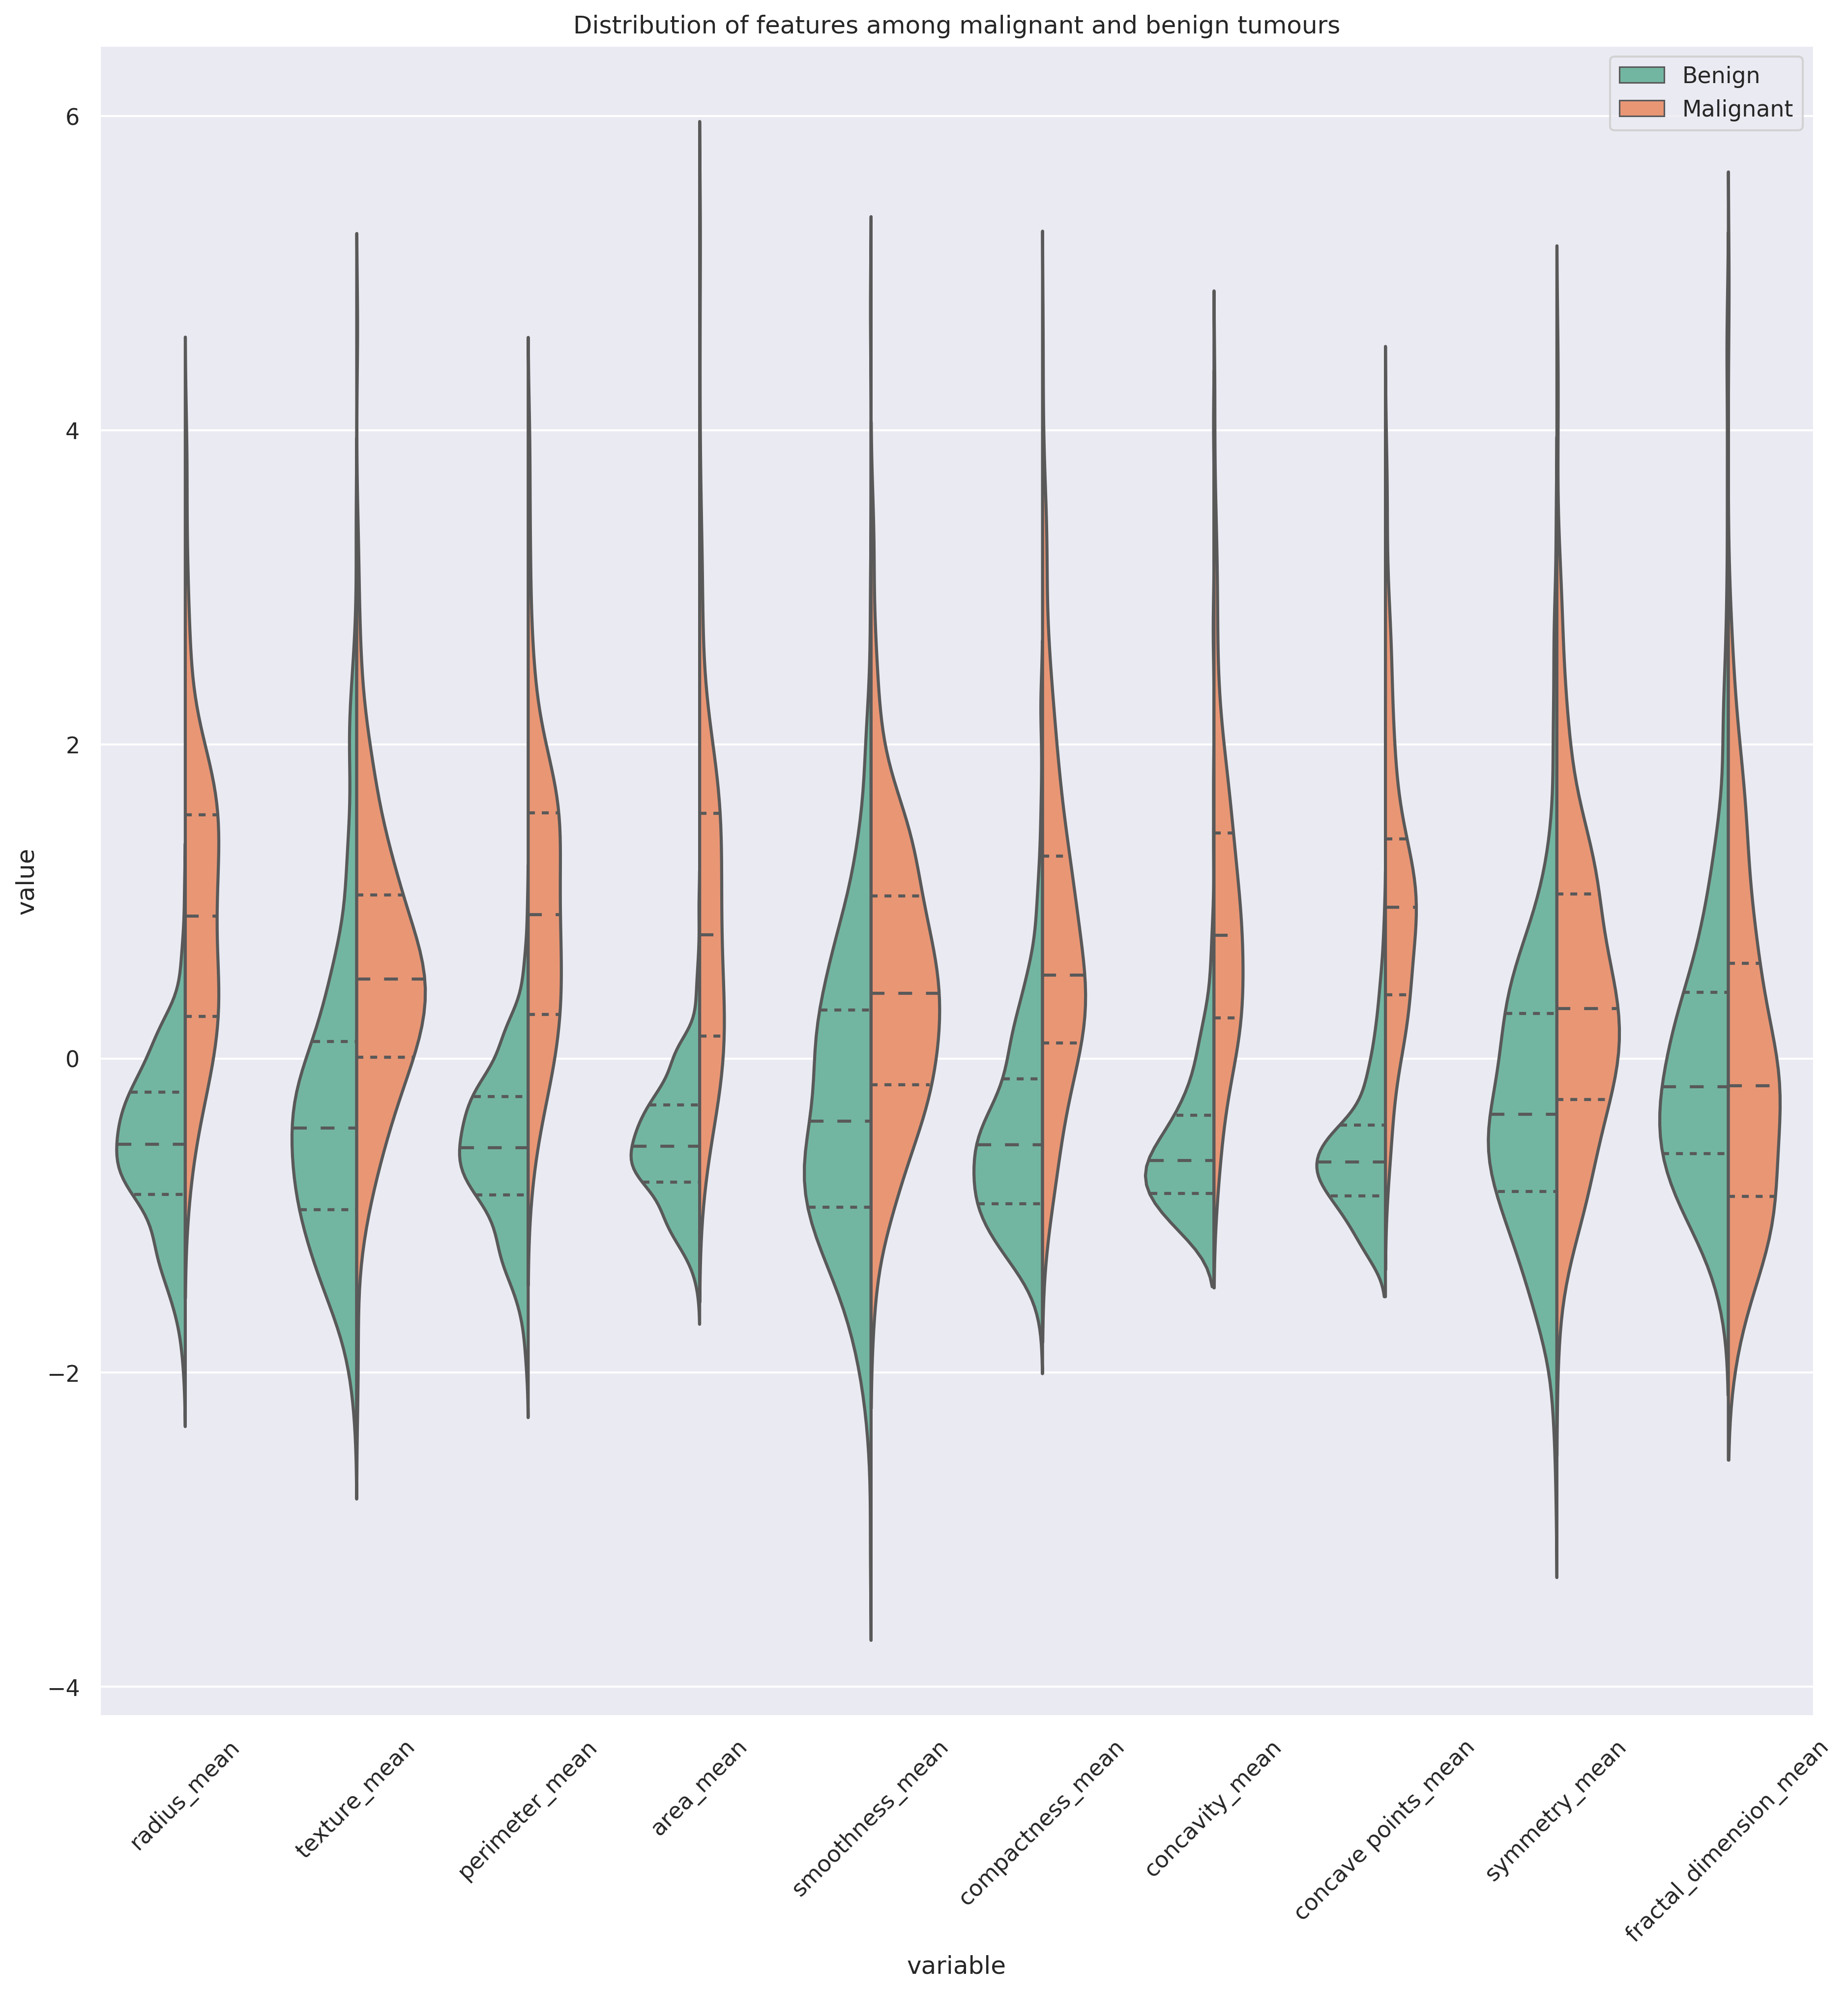

In [13]:
plot_violinplot(means)

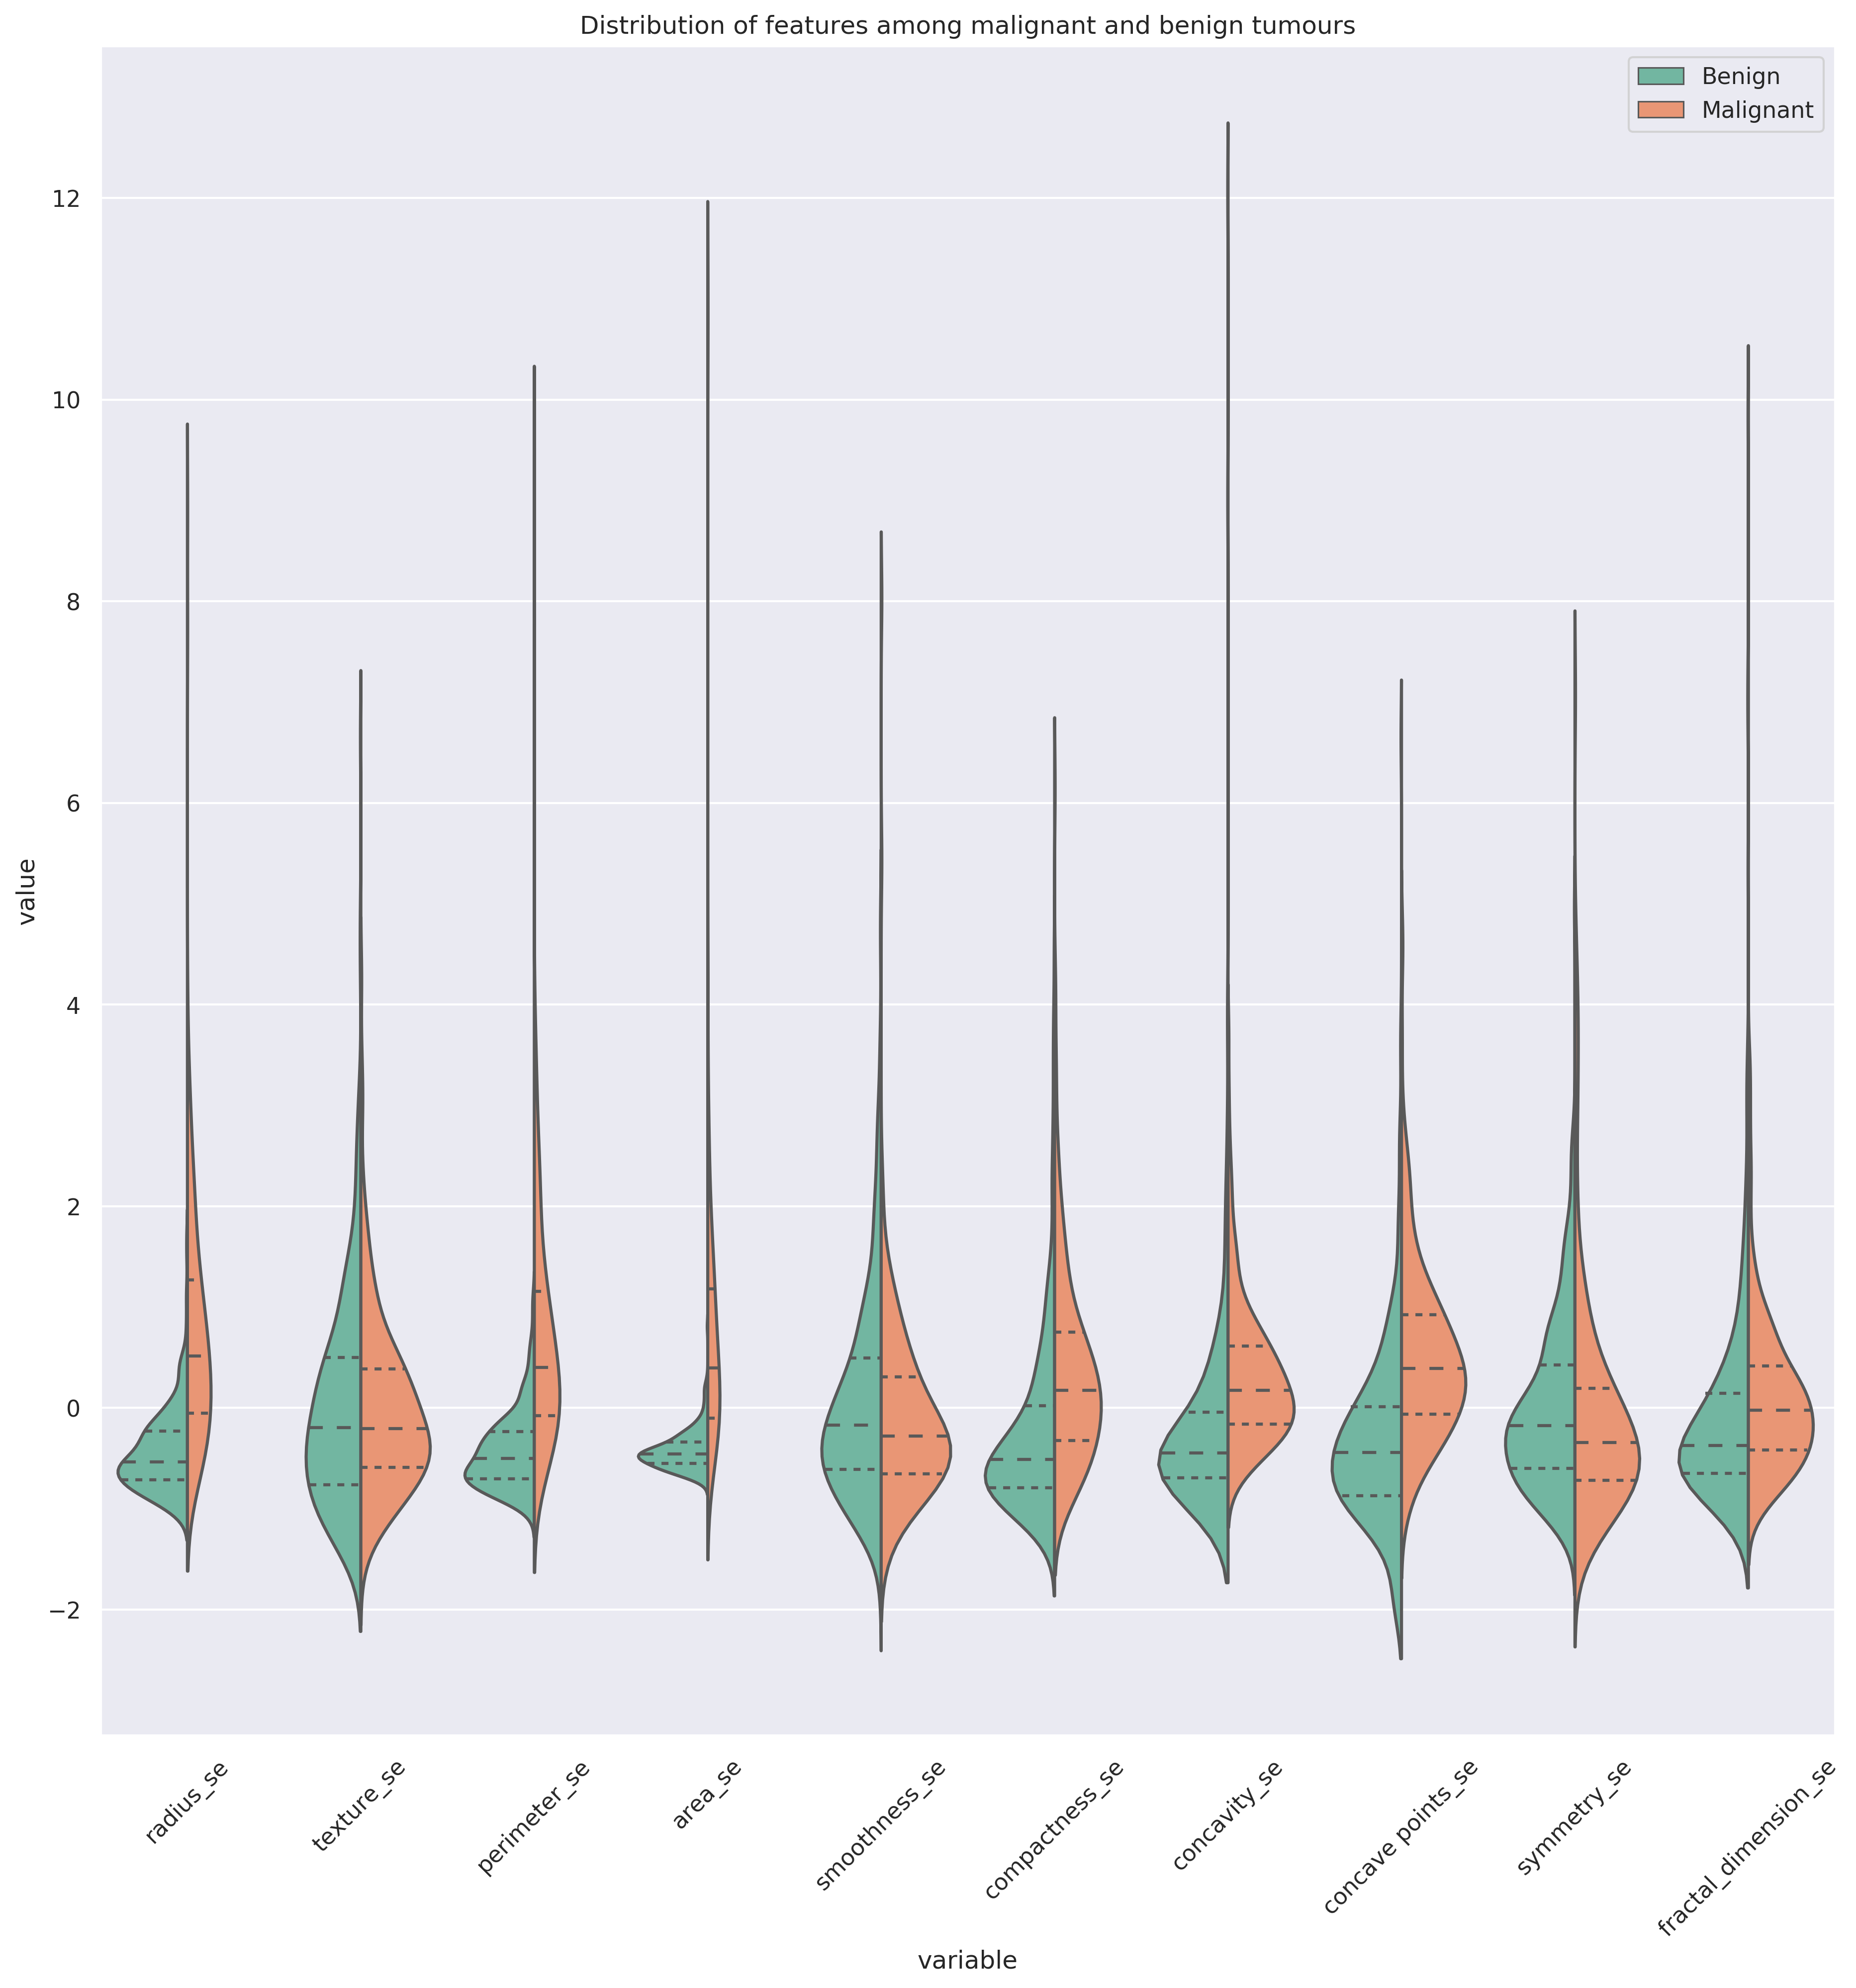

In [14]:
plot_violinplot(se)

To interpret these results, the area, radius, perimeter of cancerous cells are widely distributed and dramatically vary from cell to cell in the cytology slide, as well as the number of concave points vary broadly for malignant nuclei.

And, finally, the worst, i.e. mean of the three largest values:

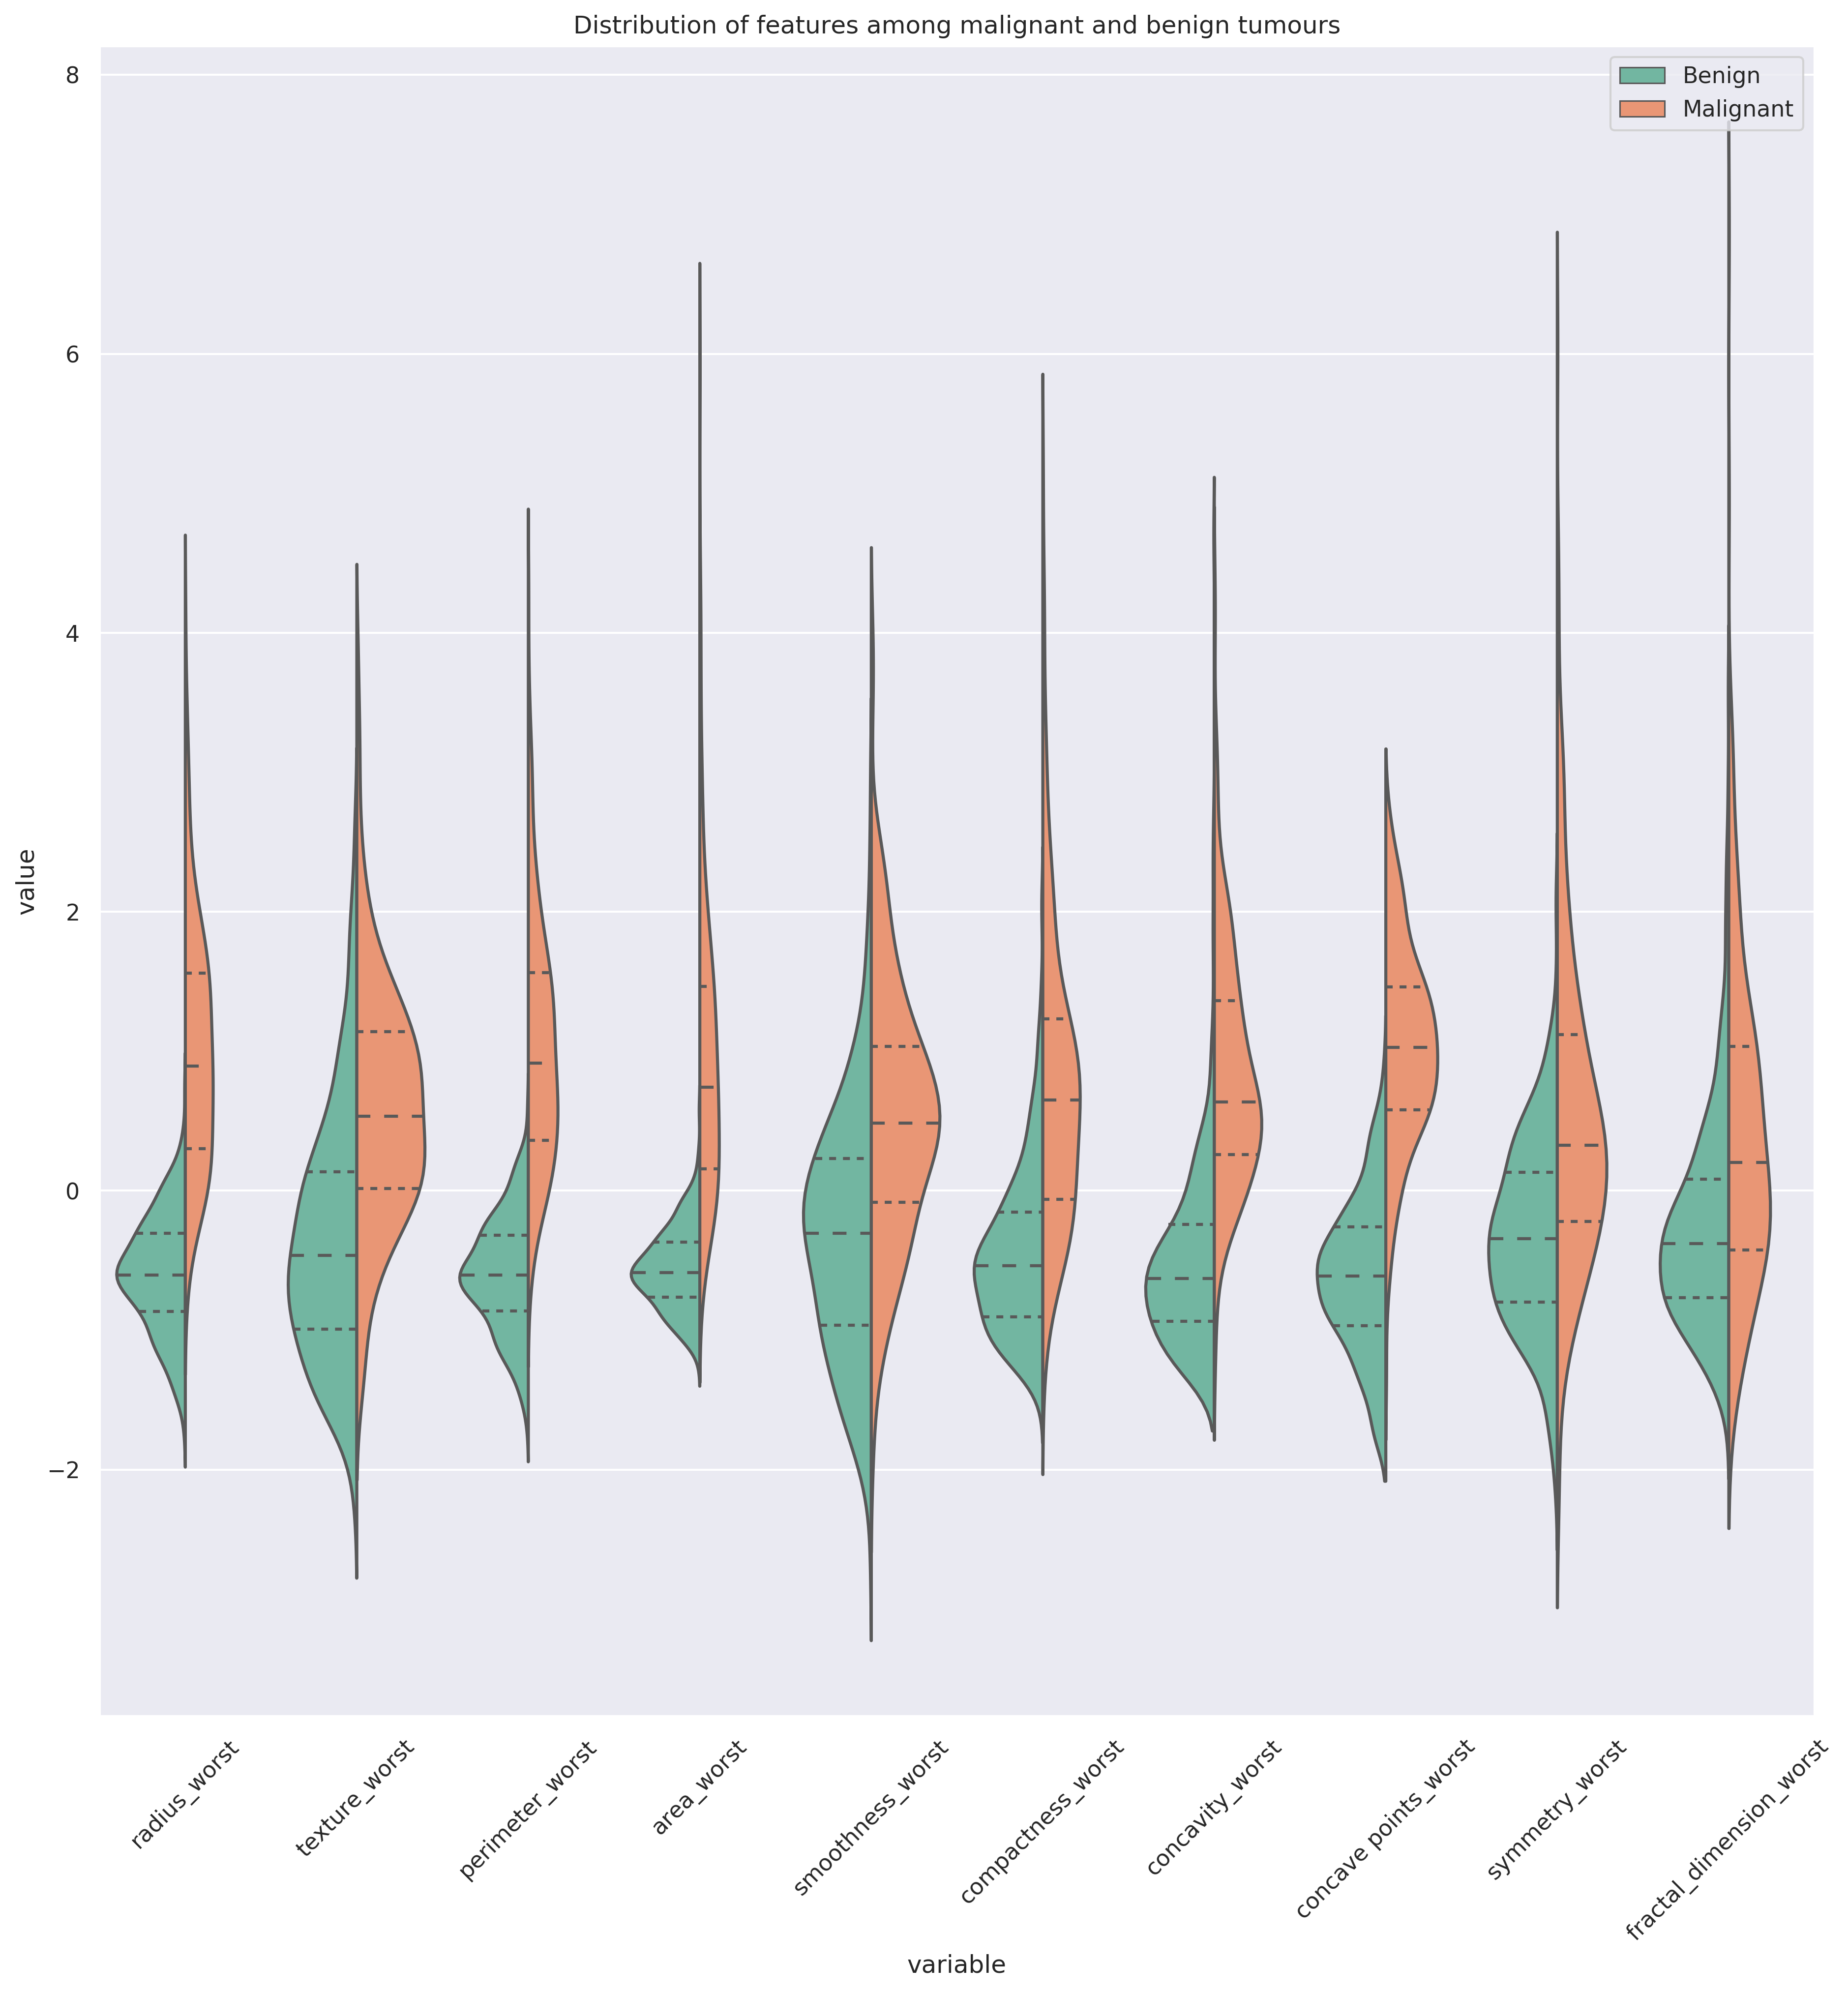

In [15]:
plot_violinplot(worst)

In [16]:
#Cross table break down by diagnosis
numerical = df.drop('diagnosis',axis=1).columns
df.groupby(['diagnosis'])[numerical].agg([np.mean, np.std, np.min, np.max])

radius_mean                          texture_mean                   \
                 mean       std    amin   amax         mean       std   amin   
diagnosis                                                                      
0           12.146524  1.780512   6.981  17.85    17.914762  3.995125   9.71   
1           17.462830  3.203971  10.950  28.11    21.604906  3.779470  10.38   

                 perimeter_mean                            area_mean  \
            amax           mean        std   amin   amax        mean   
diagnosis                                                              
0          33.81      78.075406  11.807438  43.79  114.6  462.790196   
1          39.28     115.365377  21.854653  71.90  188.5  978.376415   

                                     smoothness_mean                     \
                  std   amin    amax            mean       std     amin   
diagnosis                                                                 
0          134.287118  143.5   992.1        0.092478  0.013446  0.05263   
1          367.937978  361.6  2501.0        0.102898  0.012608  0.07371   

                  compactness_mean                            concavity_mean  \
             amax             mean       std     amin    amax           mean   
diagnosis                                                                      
0          0.1634         0.080085  0.033750  0.01938  0.2239       0.046058   
1          0.1447         0.145188  0.053987  0.04605  0.3454       0.160775   

                                     concave points_mean                     \
                std     amin    amax                mean       std     amin   
diagnosis                                                                     
0          0.043442  0.00000  0.4108            0.025717  0.015909  0.00000   
1          0.075019  0.02398  0.4268            0.087990  0.034374  0.02031   

                   symmetry_mean                            \
              amax          mean       std    amin    amax   
diagnosis                                                    
0          0.08534      0.174186  0.024807  0.1060  0.2743   
1          0.20120      0.192909  0.027638  0.1308  0.3040   

          fractal_dimension_mean                             radius_se  \
                            mean       std     amin     amax      mean   
diagnosis                                                                
0                       0.062867  0.006747  0.05185  0.09575  0.284082   
1                       0.062680  0.007573  0.04996  0.09744  0.609083   

                                    texture_se                           \
                std    amin    amax       mean       std    amin   amax   
diagnosis                                                                 
0          0.112570  0.1115  0.8811   1.220380  0.589180  0.3602  4.885   
1          0.345039  0.1938  2.8730   1.210915  0.483178  0.3621  3.568   

          perimeter_se                             area_se                     \
                  mean       std   amin    amax       mean        std    amin   
diagnosis                                                                       
0             2.000321  0.771169  0.757   5.118  21.135148   8.843472   6.802   
1             4.323929  2.568546  1.334  21.980  72.672406  61.355268  13.990   

                  smoothness_se                              compactness_se  \
             amax          mean       std      amin     amax           mean   
diagnosis                                                                     
0           77.11      0.007196  0.003061  0.001713  0.02177       0.021438   
1          542.20      0.006780  0.002890  0.002667  0.03113       0.032281   

                                      concavity_se                             \
                std      amin    amax         mean       std     amin    amax   
diagnosis                                            


### PCA

Too many variables can cause such problems as too complex visualizations, efficiency decrease by including variables that have no effect or difficult data interpretation. Principal component analysis (PCA) is a mathematical procedure that transforms a number of (possibly) correlated variables into a smaller number of uncorrelated variables called principal components. The data has 30 dimensions, but I reduce it creating 2 principal components to see whether variables can be separated into clusters. Two target classes, where dark is benign and light is malignant, are almost linearly separable:


In [17]:
warnings.filterwarnings('ignore')

df = pd.read_csv("../input/data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)

Projecting 30-dimensional data to 2D


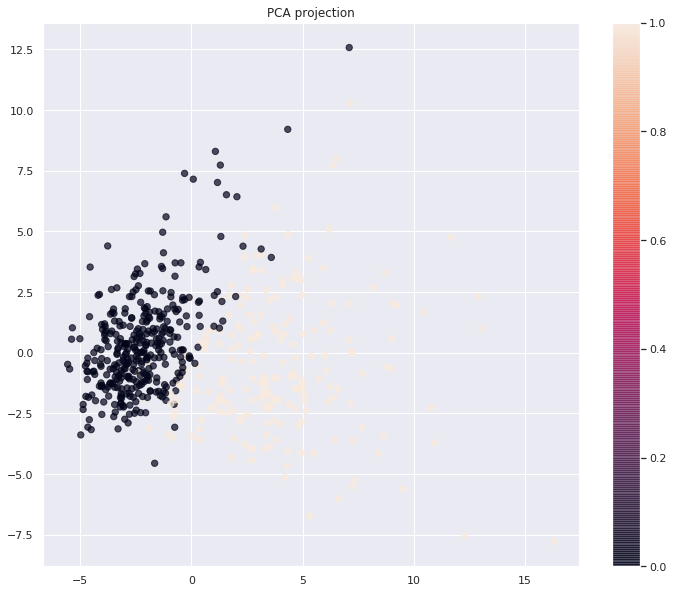

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

### t-SNE

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: *a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding*.

With t-SNE, the picture looks better since PCA has a linear constraint, while t-SNE uses a non-linear approach in the background. However, even with such a small dataset, the t-SNE algorithm takes significantly more time to complete than PCA.

Although PCA reduces attribute space from a larger number of variables to a smaller number of components, Breast Cancer Wisconsin Diagnostic Data Set has only 31 features, which is not very large number. Moreover, PCA makes independent variables less interpretable.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.238434
[t-SNE] KL divergence after 1250 iterations: 0.869098


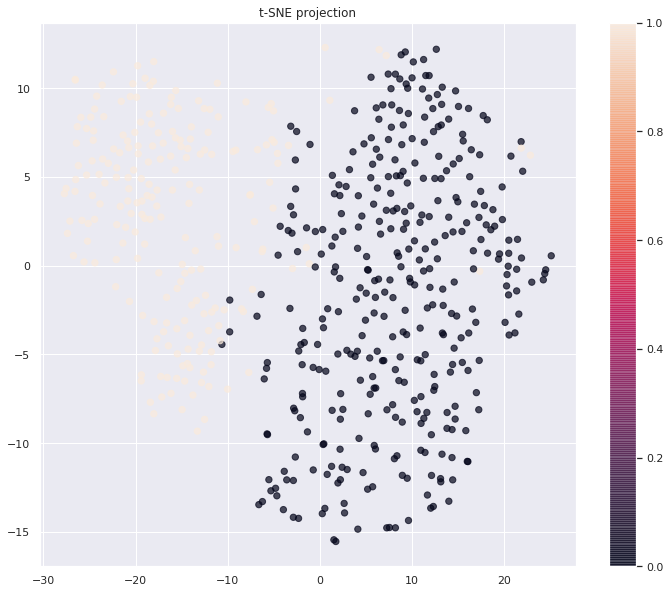

In [19]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df['diagnosis'], 
            alpha=0.7, s=40)
plt.colorbar()
plt.title('t-SNE projection');

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion (via the explained_variance_ratio). Here, that means retaining 6 principal components; therefore, we reduce the dimensionality from 30 features to 6.

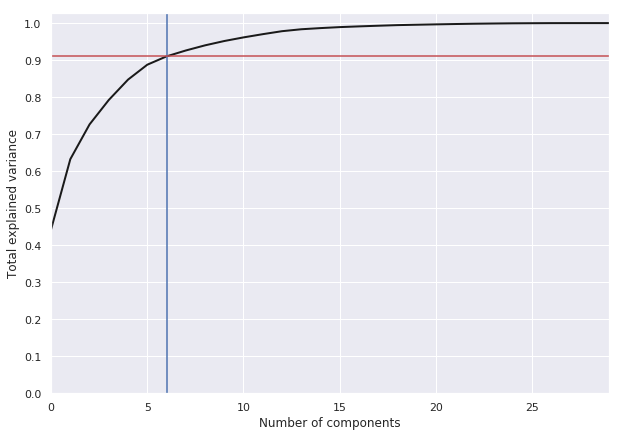

In [20]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

As it can be seen, that the first 6 components correspond to approximately 91% of the cumulative sum over all the variance. I am going to stick with PCA, since it provides similar results to t-SNE and takes less time to compute the components. And later, I will compare classification performance for the initial dataset and for pca components.

Data cleaning
As the dataset is not large, I am not going to remove any outliers in order to keep as much data as possible. But to avoid multicollinearity, I will remove some of the features to prevent overfitting. From the EDA we now know that radius, perimeter, and area are highly correlated, which makes sense. That is why it would be better to remove, say, perimeter, and area, as well as all features from "worst" samples, since worst (or largest) instances are also considered in the initial sample, which means and standart errors were computed for, therefore it leads to high correlation (>0.80), which is not surprising, too. For example, the correlation between radius_worst and radius_mean is 0.97, for texture_mean and texture_worst pair it equals to 0.91, and so on and so forth.

In [21]:
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

### Normalization


Before scaling numerical features, let's check whether they follow normal distribution:

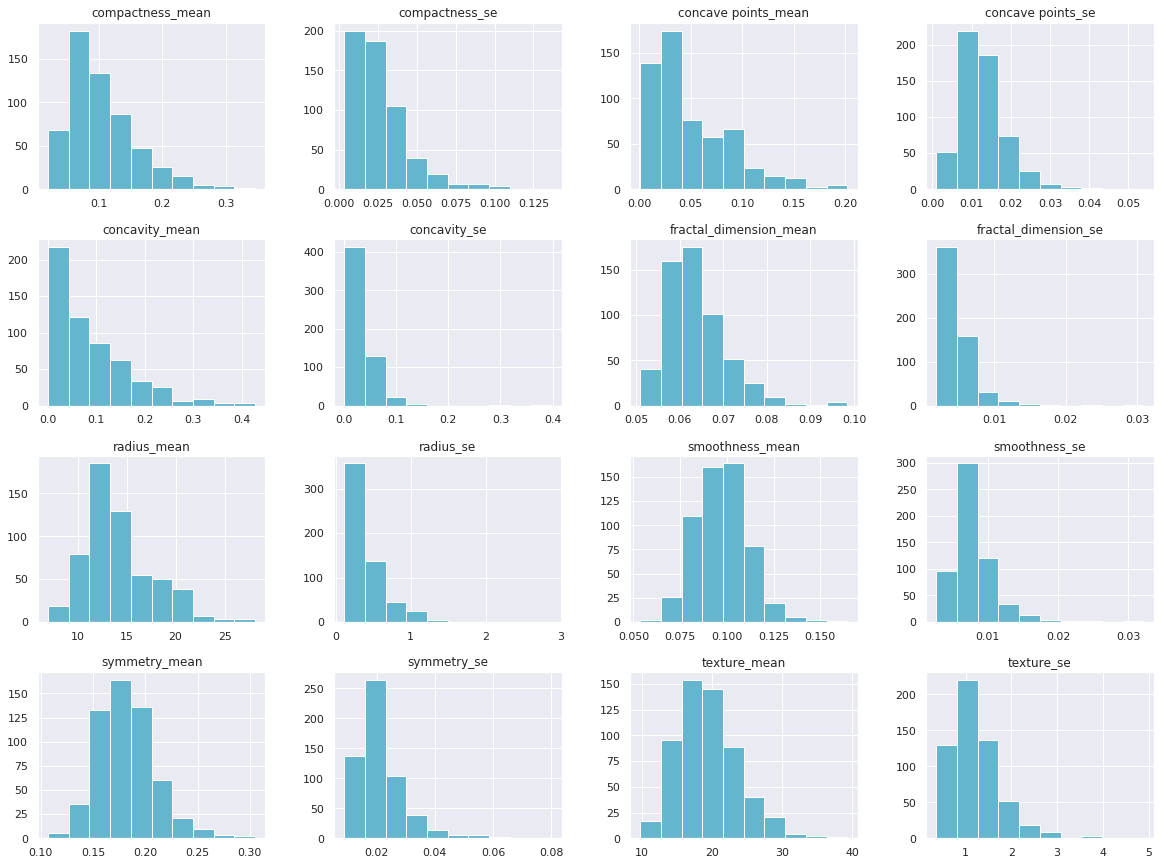

In [22]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

Almost all distributions are skewed to the right, i.e. rise very sharply in the beginning (i.e. for very small values near zero), peaks out early, then decreases sharply and leave the long tail. Each histogram is similar to lognormal distribution, a continuous distribution in which the logarithm of a variable has a normal distribution. For algorithms like linear regressions and kNN, numerical features have to be scaled in order to avoid over fitting and make more accurate predictions. And to be scaled numerical features must follow normal distribution. 

A log transformation, a popular method, is often used to transform skewed data to approximately normal and thus, to augment the reliability of the linear regression analyses. I will apply log function to make features normally

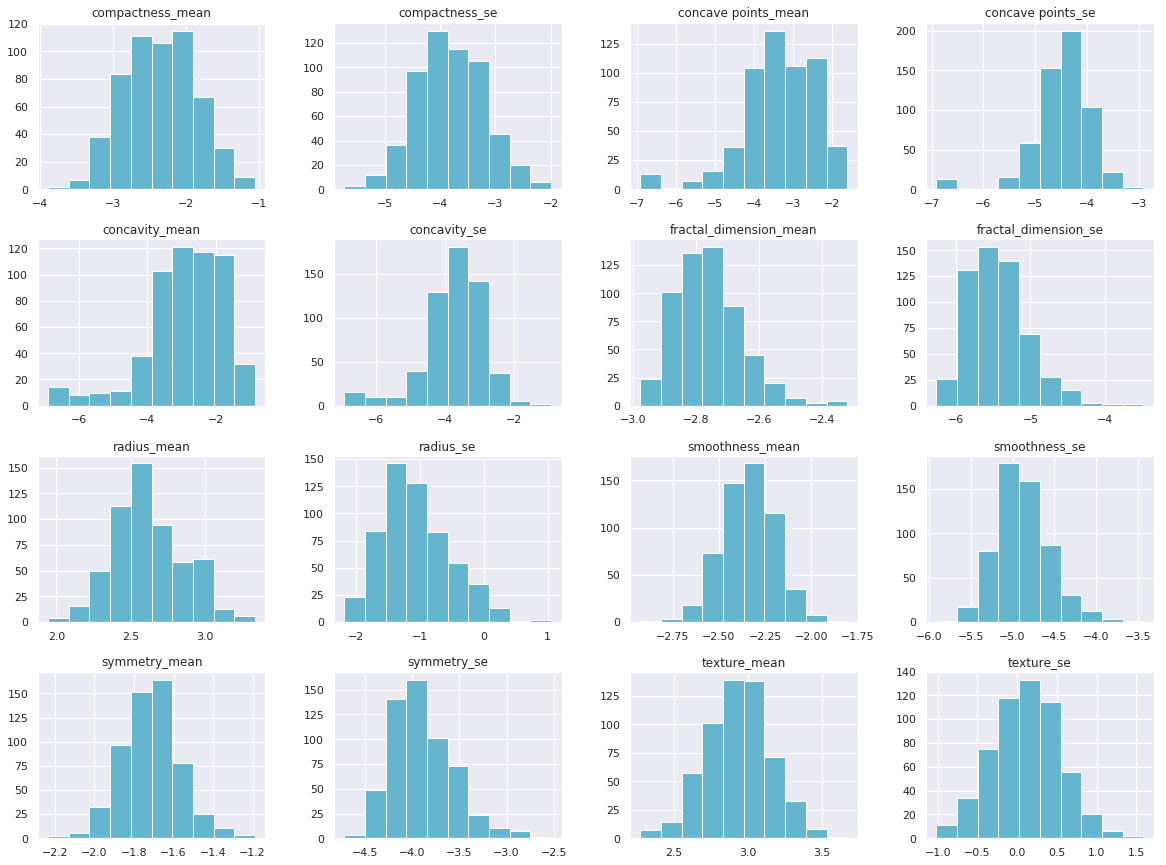

In [23]:
#Log transformation
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

Overall, almost all features have bell-shaped distribution, despite concave points features, which could be affected by malignant instances, where the number of contour concavities increases dramatically. I will use the log-transformation in Logistic regression and kNN algorithms before scaling the data. Then numerical features will be scaled with StandartScaler() function in Python, such that the distribution has a mean value of 0 and a standard deviation of 1.

In [24]:
from sklearn.model_selection import train_test_split

#Scaler should be trained on train set only to prevent information about future from leaking.

y = df['diagnosis']

X_log_train, X_log_holdout, y_train, y_holdout = train_test_split(X_log, y, test_size=0.3, random_state=17)

### Decision tree

Decision tree is one of the simplest algorithms, which can be used for classification and regression, where the relationship between features and outcome is nonlinear or where features interact with each other. Decision trees in general do not usually require scaling. With the help of GridSearchCV function in Python, which exhaustively searches model optimal parameters by cross-validated grid-search over a parameter grid, best parameters, such as the depth of the tree, split criteria, the minimum number of samples for a leaf node, can be identified:

In [25]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 5), 'max_features': range(3, 6), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [26]:
#Best Parameters
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'entropy', 'max_depth': 2, 'max_features': 4},
 0.9535280569514237)

The best split criteria here is the entropy, the depth of the tree equals to 2, as all instances are fully exhausted within two splits. The visualization has the following meaning: the higher the number of concave points in the cell nucleus and the greater the radius is, the higher the probability that the cell is cancerous. 

One of the main disadvantages of using Decision tree is a prone to overfitting. We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Furthermore, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.

In addition, the trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

tree_pred = tree_grid.predict(X_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, tree_pred))

Accuracy Score :  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) :  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8309859154929577


Recall equals to 0.9672, Precision Score is 0.8310, and Accuracy Score = 0.9181

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_holdout, tree_pred)

array([[98, 12],
       [ 2, 59]])

In [29]:
from sklearn.tree import export_graphviz
tree_graph = export_graphviz(tree_grid.best_estimator_, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png 

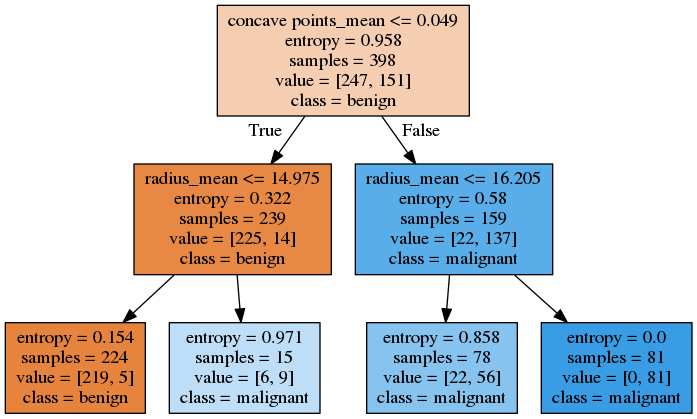

In [30]:
from IPython.display import Image
Image(filename = 'tree.png')

In [31]:
numerical = df.drop('diagnosis',axis=1).columns

df.groupby(['diagnosis'])[numerical].agg([np.mean, np.std, np.min, np.max])

radius_mean                          texture_mean                   \
                 mean       std    amin   amax         mean       std   amin   
diagnosis                                                                      
0           12.146524  1.780512   6.981  17.85    17.914762  3.995125   9.71   
1           17.462830  3.203971  10.950  28.11    21.604906  3.779470  10.38   

                 smoothness_mean                            compactness_mean  \
            amax            mean       std     amin    amax             mean   
diagnosis                                                                      
0          33.81        0.092478  0.013446  0.05263  0.1634         0.080085   
1          39.28        0.102898  0.012608  0.07371  0.1447         0.145188   

                                     concavity_mean                     \
                std     amin    amax           mean       std     amin   
diagnosis                                                                
0          0.033750  0.01938  0.2239       0.046058  0.043442  0.00000   
1          0.053987  0.04605  0.3454       0.160775  0.075019  0.02398   

                  concave points_mean                              \
             amax                mean       std     amin     amax   
diagnosis                                                           
0          0.4108            0.025717  0.015909  0.00000  0.08534   
1          0.4268            0.087990  0.034374  0.02031  0.20120   

          symmetry_mean                           fractal_dimension_mean  \
                   mean       std    amin    amax                   mean   
diagnosis                                                                  
0              0.174186  0.024807  0.1060  0.2743               0.062867   
1              0.192909  0.027638  0.1308  0.3040               0.062680   

                                      radius_se                            \
                std     amin     amax      mean       std    amin    amax   
diagnosis                                                                   
0          0.006747  0.05185  0.09575  0.284082  0.112570  0.1115  0.8811   
1          0.007573  0.04996  0.09744  0.609083  0.345039  0.1938  2.8730   

          texture_se                          smoothness_se            \
                mean       std    amin   amax          mean       std   
diagnosis                                                               
0           1.220380  0.589180  0.3602  4.885      0.007196  0.003061   
1           1.210915  0.483178  0.3621  3.568      0.006780  0.002890   

                             compactness_se                              \
               amin     amax           mean       std      amin    amax   
diagnosis                                                                 
0          0.001713  0.02177       0.021438  0.016352  0.002252  0.1064   
1          0.002667  0.03113       0.032281  0.018387  0.008422  0.1354   

          concavity_se                            concave points_se            \
                  mean       std     amin    amax              mean       std   
diagnosis                                                                       
0             0.025997  0.032918  0.00000  0.3960          0.009858  0.005709   
1             0.041824  0.021603  0.01101  0.1438          0.015060  0.005517   

                             symmetry_se                               \
               amin     amax        mean       std      amin     amax   
diagnosis                                                               
0          0.000000  0.05279    0.020584  0.006999  0.009539  0.06146   
1          0.005174  0.04090    0.020472  0.010065  0.007882  0.07895   

          fractal_dimension_se                               
                          mean       std      amin     amax  
diagnosis                                                    
0                     0.

### Logistic Regression
with normalized data


Logistic Regression is one of the most used Machine Learning algorithms for binary classification. It is a widely used technique because it is very efficient, does not require too many computational resources, highly interpretable, and easy to regularize. The implementation of logistic regression in Python can be accessed from class LogisticRegression in scikit-learn library. This implementation can fit binary logistic regression with default L2 or L1 regularization.



In [32]:
Cs = np.logspace(-1, 8, 5)

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': array([1.00000e-01, 1.77828e+01, 3.16228e+03, 5.62341e+05, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [33]:
#Best parameters
lr_pipe_grid.best_params_, lr_pipe_grid.best_score_

({'lr__C': 3162.2776601683795}, 0.9606574539363485)

In [34]:
scores=[]
for C in Cs:
    pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=C, random_state=17,solver='liblinear'))])
    scores.append(cross_val_score(pipe,X_log_train, y_train,cv=10, scoring='recall').mean())

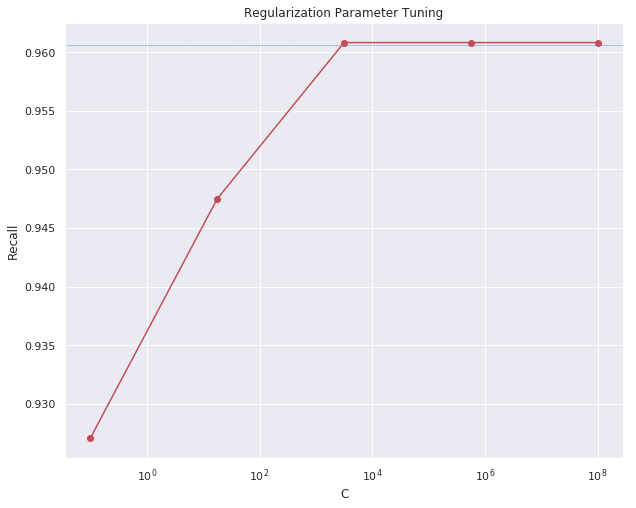

In [35]:
score_C_1 = lr_pipe_grid.best_score_
sns.set()
plt.figure(figsize=(10,8))
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Regularization Parameter Tuning')
# horizontal line -- model quality with default C value
plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

In [36]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))

Accuracy Score :  0.9532163742690059
Recall Score (how much of malignant tumours were predicted correctly) :  0.9016393442622951
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9649122807017544


Accuracy Score : 0.9532, Recall is 0.9016, and precision is 0.9649

By default, LogisticRegression() use L2 penalty, and I search for a best regularization parameter C, the inverse of regularization strength.  I fitted the logit model both on non-normalized and normalized data to compare the results and examine the performance of both approaches:

a)	Logistic regression fits raw data and makes predictions based on non-scaled features. It resulted in almost zero coefficients for three features: radius_mean, texture_mean and texture_se. These features have larger ranges in comparison with other attributes, and logistic regression assigns very small coefficients to them to reduce their impact on a result. At the same time, concavity_se and concave_points_se have small ranges and concave_points_se feature varies approximately from 0 to 0.05, while radius_mean lies within 6.98 and 28.11 values. It means that small changes in concave_points_se could affect the result and change the target class from 0 to 1 or the other way around, while small changes in radius_mean could not make such big impact and hardly has any effect on the response variable. In this case, greater coefficients are assigned for concavity_se and concave_points_se attributes:

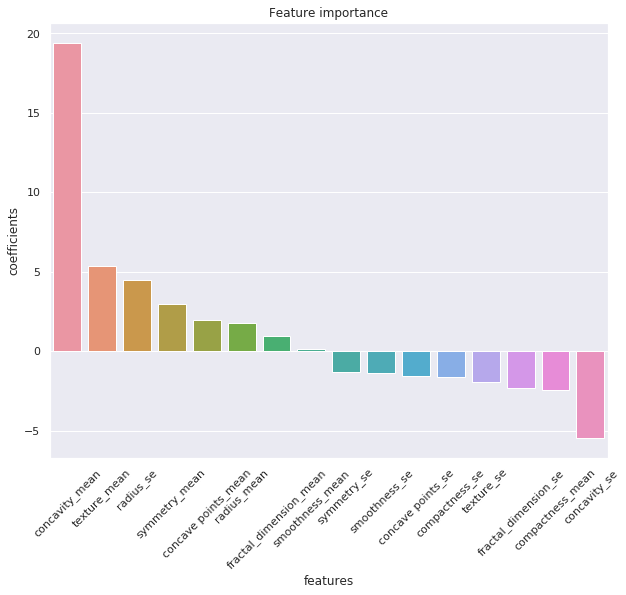

In [37]:
lr_best_pipe = lr_pipe_grid.best_estimator_.named_steps['lr']

#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best_pipe.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)

#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=45);

with non-normalized data

In [38]:
C_scores = np.logspace(-1, 8, 5)

lr = LogisticRegression(random_state=17,solver='liblinear')

lr_params = {'C': C_scores}

lr_grid = GridSearchCV(lr, lr_params, cv=10, scoring='recall')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-01, 1.77828e+01, 3.16228e+03, 5.62341e+05, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [39]:
lr_grid.best_params_, lr_grid.best_score_

({'C': 562341.3251903491}, 0.960395728643216)

In [40]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_grid.predict(X_log_holdout)))

Accuracy Score :  0.3567251461988304
Recall Score (how much of malignant tumours were predicted correctly) :  1.0
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.3567251461988304


After that GridSearch() implements a “fit” and a “score” method. When “fitting” LogisticRegression on a dataset all the possible values of regularization parameter are evaluated using 10-fold stratified cross-validation and the best value and array of scores are retained.

One of the simplest options to understand the influence of given parameters in a linear classification model, is to consider the magnitude of its coefficient times the standard deviation of the corresponding parameters in the data. As variables have been already scaled, I simply visualize the magnitude of coefficients in the logit model:

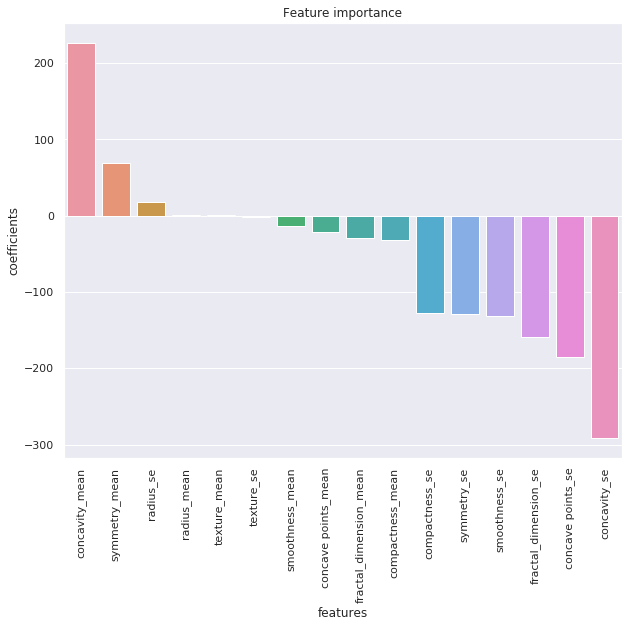

In [41]:
lr_best= lr_grid.best_estimator_

#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)

#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=90);

### Random Forest


Random forest is the construction of uncorrelated trees using CART, bagging, and the random subspace method. Decision trees are a good choice for the base classifier in bagging since they are quite sophisticated and can achieve zero classification error on any sample. The random subspace method reduces the correlation between the trees and thus prevents overfitting. With bagging, the base algorithms are trained on different random subsets of the original feature set.

There are many successful use cases where the random forest algorithm was used in highly unbalanced datasets. But the best hyperparameters are usually impossible to determine ahead of time. Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations to evaluate the performance of each model. Using Scikit-Learn’s GridSearchCV method, I define a grid of hyperparameter ranges, and randomly sample from the grid, performing Stratified K-Fold cross-validation with each combination of values.

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Stratified split for the validation process
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters
rfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,3), 'max_depth': range(3,13), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1)

gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': range(1, 11), 'min_samples_leaf': range(1, 3), 'max_depth': range(3, 13), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [43]:
gcv.best_params_, gcv.best_score_

({'criterion': 'entropy',
  'max_depth': 4,
  'max_features': 7,
  'min_samples_leaf': 1},
 0.9199329983249581)

In [44]:
#RandomForest classifier with the default parameters 
rfc = RandomForestClassifier(n_estimators=100, criterion ='gini', max_depth = 8, max_features = 6, min_samples_leaf = 1, random_state = 17, n_jobs=-1)
forest_pred = gcv.predict(X_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, forest_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, forest_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, forest_pred))

Accuracy Score :  0.9707602339181286
Recall Score (how much of malignant tumours were predicted correctly) :  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9516129032258065


In [45]:
rfc = gcv.best_estimator_
estimators_tree_98 = rfc.estimators_[98]

estimators_tree_3 = rfc.estimators_[3]

estimators_tree_47 = rfc.estimators_[47]

In [46]:
estimators_tree_3.n_features_

16

To interpret results of Random Forest classifier randomly selected trees could be visualized:

In [47]:
tree_graph_98 = export_graphviz(estimators_tree_98, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_98.dot')
!dot -Tpng tree_98.dot -o tree_98.png 

tree_graph_3 = export_graphviz(estimators_tree_3, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_3.dot')
!dot -Tpng tree_3.dot -o tree_3.png 

tree_graph_47 = export_graphviz(estimators_tree_47, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns, filled=True, out_file='tree_47.dot')
!dot -Tpng tree_47.dot -o tree_47.png 

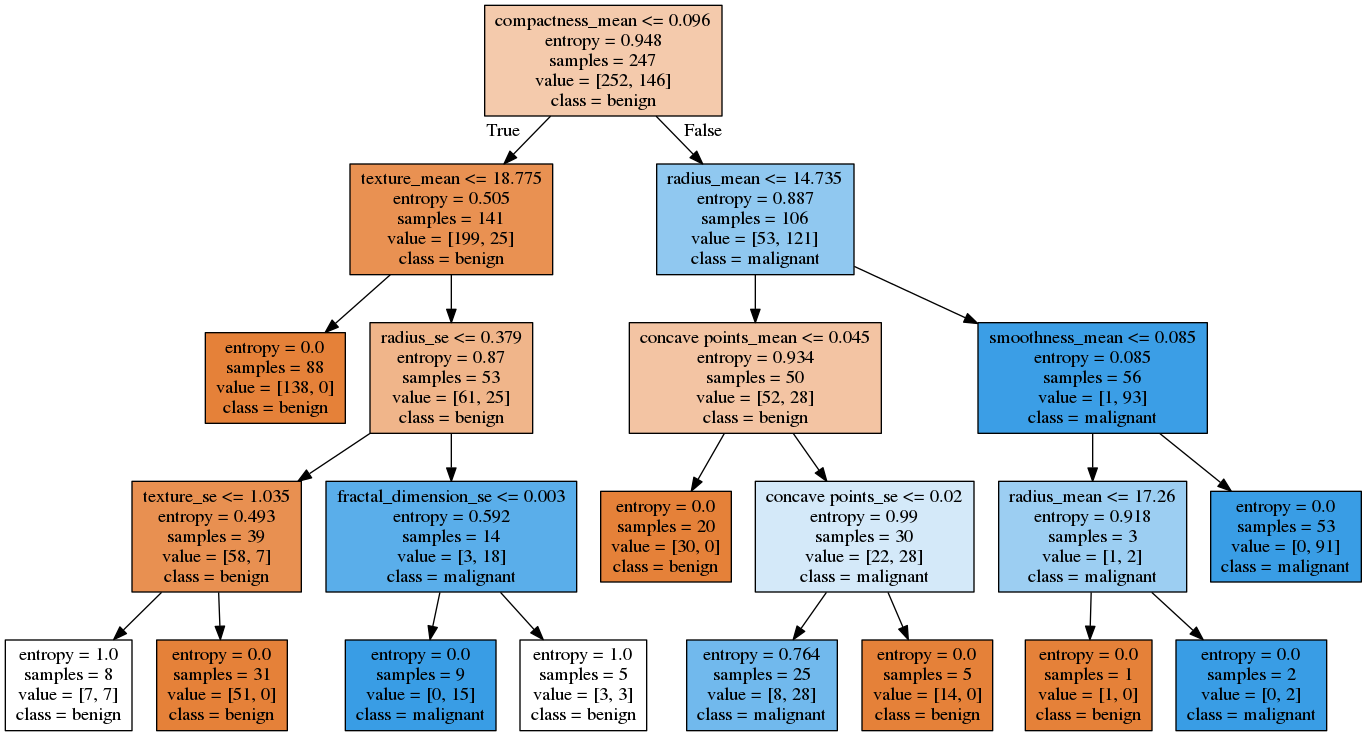

In [48]:
Image(filename = 'tree_98.png')

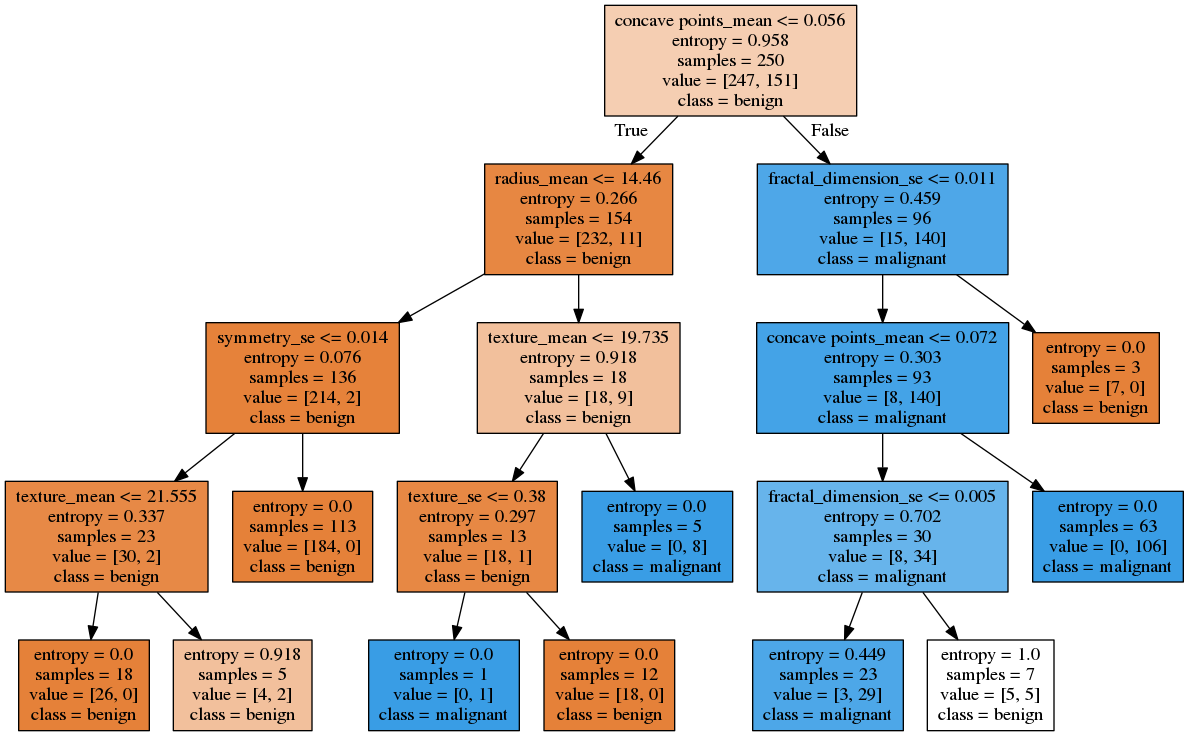

In [49]:

Image(filename = 'tree_3.png')


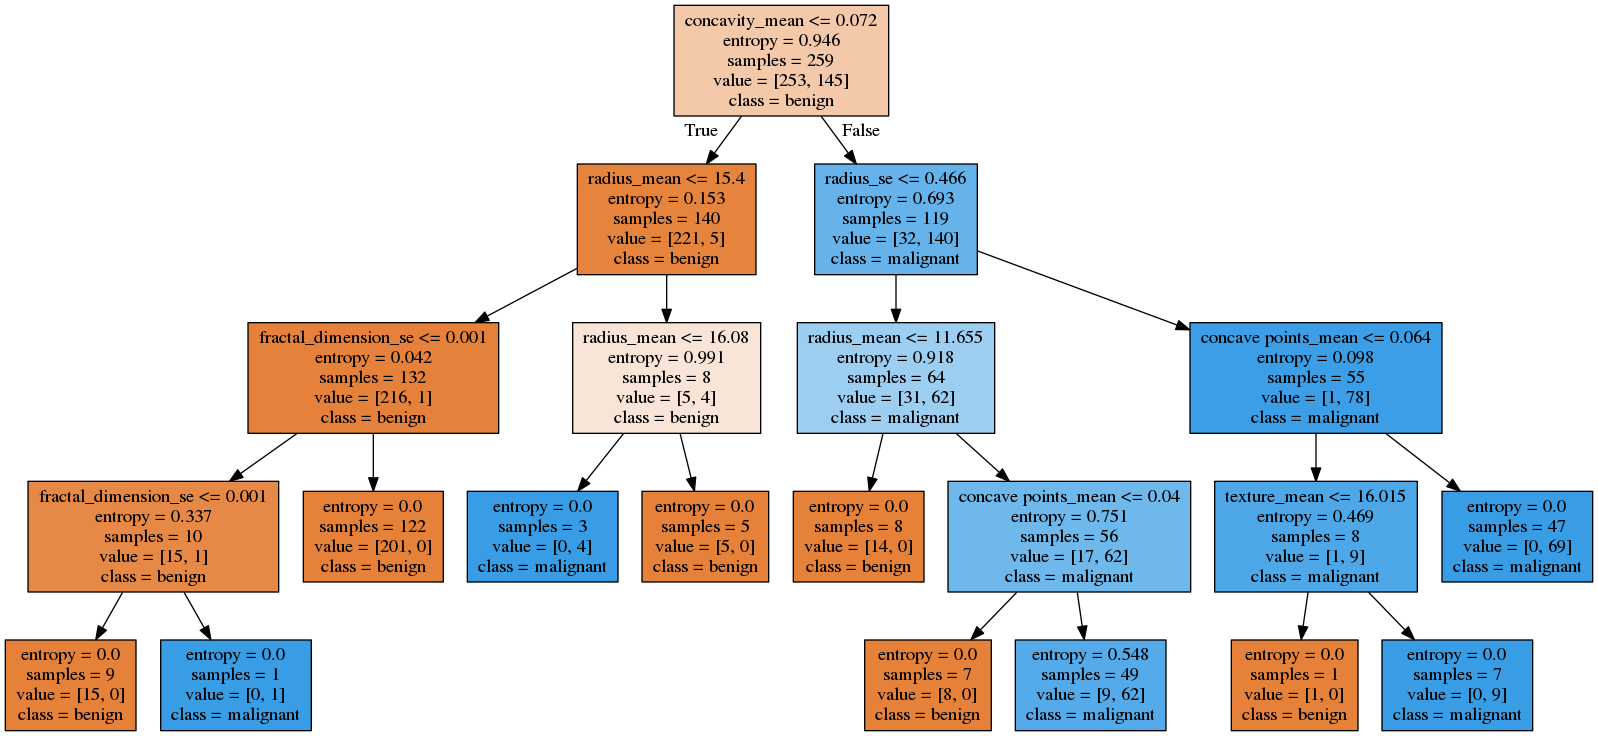

In [50]:
Image(filename = 'tree_47.png')

As can be seen, concavity_mean is the root node and has the highest information gain, which is why it is split first. The second nodes are texture_mean and concavity_se: the less contrasted the picture is, the more probability that the cell nucleus is benign. 

One of the greatest advantages of using Random forest in a classification problem is that it is robust to outliers because of the random sampling method. Moreover, it handles both continuous and discrete variables equally well. In practice, an increase in the tree number almost always improves the composition and therefore rarely overfits. But in comparison with a single decision tree, Random Forest's output is more difficult to interpret.

In [51]:
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1))])

rf_params = {'rf__max_features': range(3,10), 'rf__min_samples_leaf': range(1,3), 'rf__max_depth': range(5,12), 'rf__criterion':['gini','entropy']}


rf_pipe_grid = GridSearchCV(rf_pipe, rf_params, cv=10, scoring='recall')
rf_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease...mators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rf__max_features': range(3, 10), 'rf__min_samples_leaf': range(1, 3), 'rf__max_depth': range(5, 12), 'rf__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [52]:
rf_pipe_grid.best_params_, rf_pipe_grid.best_score_

({'rf__criterion': 'gini',
  'rf__max_depth': 7,
  'rf__max_features': 7,
  'rf__min_samples_leaf': 1},
 0.927324120603015)

In [53]:
print ("Accuracy Score on scaled data: ",accuracy_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))

Accuracy Score on scaled data:  0.9473684210526315
Recall Score (how much of malignant tumours were predicted correctly) :  0.9344262295081968
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9193548387096774


### kNN

The nearest neighbors method is another quite popular classification method that is also sometimes used in classification problems. This, like decision trees, is one of the most comprehensible approaches to classification. The underlying intuition is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class. 

Features with a larger range of values can dominate the distance metric relative to features that have a smaller range, so feature scaling is important. For continuous data, kNN uses a distance metric like Euclidean or Minkowski distance. As all features are numerical, we do not need to change the default metric, which is 'minkowski'.



In [54]:
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("../input/data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

In [55]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1).values
X_scaled = StandardScaler().fit_transform(X)

#Define k-NN classifier and train on a scaled dataset
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_scaled, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

To assign the class, when neighbors do not have the same class, KNeighborsClassifier() method in Python has 'weights' parameter:

•    'uniform' takes a simple majority vote from the neighbors. Whichever class has the greatest number of votes becomes the class for the new data point.
•    'distance' takes a similar vote except gives a heavier weight to those neighbors that are closer. For example, if the neighbor is 5 units away, then weight its vote 1/5. As the neighbor gets further away, the weight gets smaller.

Using GridSearchCV() it can be computed that 'uniform' metric performs better than 'distance' in this case and that the best number of neighbors equals to five. 

In [56]:
knn_params = {'n_neighbors': range(1, 11), 'weights':['uniform', 'distance']}

X_scaled_train, X_scaled_holdout, y_train, y_holdout = train_test_split(X_scaled, y, test_size=0.3,
                                                                        random_state=17)

#knn_grid.best_estimator_.predict(X_scaled_train)
knn_grid = GridSearchCV(knn, knn_params, cv=10, n_jobs=-1, scoring='recall')

knn_grid.fit(X_scaled_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 1, 'weights': 'uniform'}, 0.933856783919598)

In [57]:
pred = knn_grid.best_estimator_.predict(X_scaled_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, pred))
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, pred) )
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, pred))

Accuracy Score :  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8615384615384616


In [58]:
cm = confusion_matrix(y_holdout, pred)
cm

array([[101,   9],
       [  5,  56]])

Let's compare how kNN performs, if we select 3 and 5 closest neighbors. To compare how kNN performs for 3 and 5 closest neighbors, the colour plot could be drawn, where purple background represents areas predicted as malignant and pink represents areas predicted as benign:

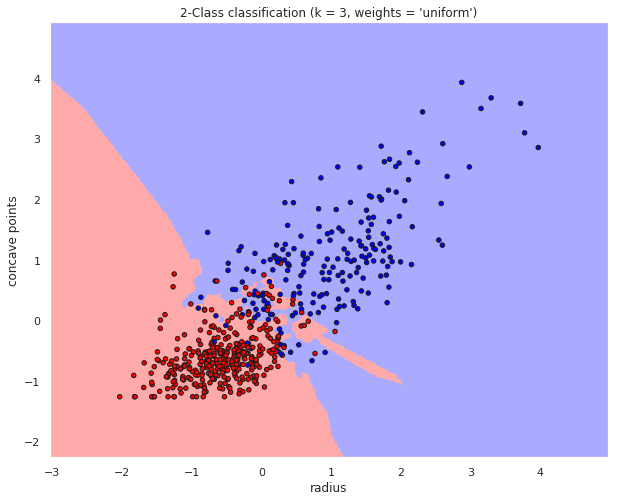

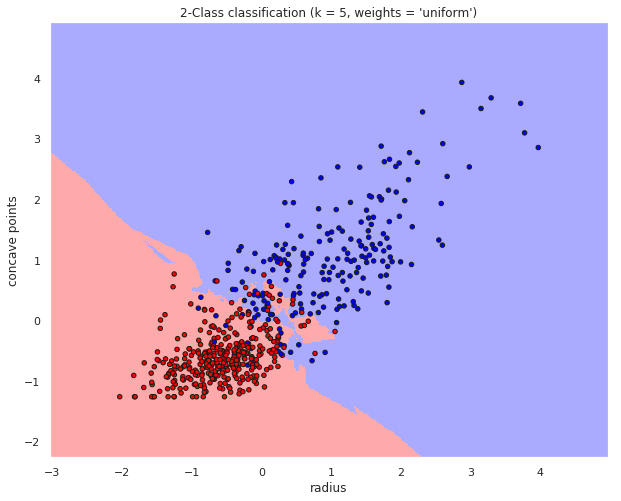

In [59]:
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh
weights ='uniform'
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we only take the first two features: radius_mean and concave points_mean. We could avoid this ugly
# slicing by using a two-dim dataset

for n_neighbors in [3,5]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_scaled[:,[0,5]], y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
    y_min, y_max = X_scaled[:,5].min() - 1, X_scaled[:,5].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_scaled[:, 0], X_scaled[:, 5], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel("radius")
    plt.ylabel("concave points")

plt.show()

Recall score could be also compared between train and test sets plotting for each number of nearest neighbors. As can be observed, the best number of neighbours for the training data is 5 where recall score is above 0.93:

Text(0, 0.5, 'Recall')

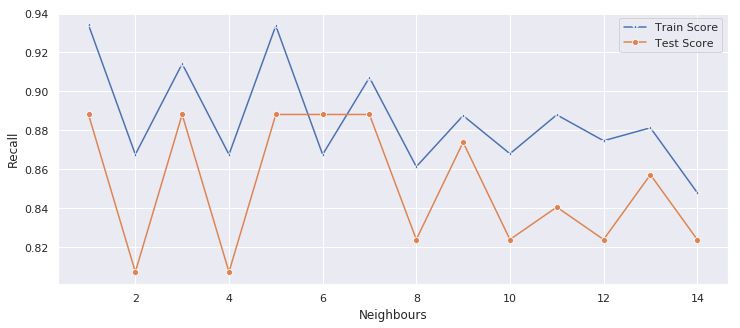

In [60]:

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    train_scores.append(cross_val_score(knn, X_scaled_train,y_train,cv=10, scoring='recall').mean())
    test_scores.append(cross_val_score(knn, X_scaled_holdout,y_holdout,cv=10, scoring='recall').mean())
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.xlabel("Neighbours")
plt.ylabel("Recall")

There are a number of model evaluation techniques for the classification problem, I decided to choose three performance metrics: accuracy, recall and precision scores. The most important is recall score, as we are interested in how many of malignant tumours were predicted correctly. Scores are computed for the holdout part, which takes 30% of data, using 10-fold cross validation, and compared with actual values.


Decision tree:
Accuracy Score:  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly):  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8309859154929577


Random Forest:
* CV accuracy score: 94.89%
* CV recall score: 92.74%
* CV precision score: 93.05%


Logistic regression:

* Accuracy Score:  0.3567251461988304
* Recall Score (how much of malignant tumours were predicted correctly):  1.0
* Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.3567251461988304

kNN:
* Accuracy Score :  0.9181286549707602
* Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
* Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8615384615384616


Random forest is considered as an advanced machine learning technique, especially if the dataset is imbalanced or has categorical features. But in this case, all independent variables are numerical and target class has ratio approximately 0.6:0.4. An interesting observation I found when increasing the variance in the explanatory and noise variables, logistic regression consistently performed with higher overall accuracy as compared to random forest. Kaitlin Kirasich and Trace Smith described in their review [9] the main differences between Random Forest and Logistic Regression in Binary Classification for Heterogeneous Datasets. 

Logistic regression deals well with scaled numerical features and when the data is linearly separable. However, if variables are not normalized, the accuracy score drops sharply from 95% to 35%.

The difficulty of model selection by evaluating the overall classification performance between random forest and logistic regression for datasets comprised of various underlying structures: increasing the variance in the explanatory and noise variables, increasing the number of noise variables, increasing the number of explanatory variables, increasing the number of observations.


### Conclusion

Random forest shows better performance based on recall scores, which means more malignant tumours were predicted correctly, although logistic regression has a higher precision score.  One of the greatest advantages of using Random forest in a classification problem is that it is robust to outliers because of the random sampling method and it handles both continuous and discrete variables equally well. 

## Thank You!